Preparing data for model training

In [7]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor

# Fetching data from separate CSV file
# Warning: Boston housing was depreciated earlier due ethical reasons! Using for educational purporse only!
data = pd.read_csv('BostonHousing.csv')
x = data.drop('medv', axis=1)
y = data['medv']
#print(data)

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

architectures = [
    (10,),
    (50,),
    (100,),
    (50, 50),
    (100, 50, 25),
    (150, 100, 50)
]

results = []

Model comparsion

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

for arch in architectures:
    model = MLPRegressor(
        hidden_layer_sizes=arch,
        activation='relu',
        solver='adam',
        max_iter=2000,
        early_stopping=True,
        validation_fraction=0.2,
        random_state=42
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    metrics = pd.DataFrame({
        "Metric": ["Mean Squared Error", "R-squared", "Iterations"],
        "Value": [
            mean_squared_error(y_test, y_pred),
            r2_score(y_test, y_pred),
            model.n_iter_
        ]
    })
    results.append(metrics)

    print(f"Model architecture: {arch}")
    print(f"{metrics}\n")



Model architecture: (10,)
               Metric       Value
0  Mean Squared Error   85.401553
1           R-squared   -0.146128
2          Iterations  623.000000

Model architecture: (50,)
               Metric       Value
0  Mean Squared Error   28.778847
1           R-squared    0.613775
2          Iterations  348.000000

Model architecture: (100,)
               Metric       Value
0  Mean Squared Error   27.569487
1           R-squared    0.630005
2          Iterations  171.000000

Model architecture: (50, 50)
               Metric      Value
0  Mean Squared Error  60.278610
1           R-squared   0.191033
2          Iterations  65.000000

Model architecture: (100, 50, 25)
               Metric       Value
0  Mean Squared Error   19.825017
1           R-squared    0.733939
2          Iterations  338.000000

Model architecture: (150, 100, 50)
               Metric       Value
0  Mean Squared Error   17.857973
1           R-squared    0.760338
2          Iterations  247.000000



Plotting results

85.40155260388654


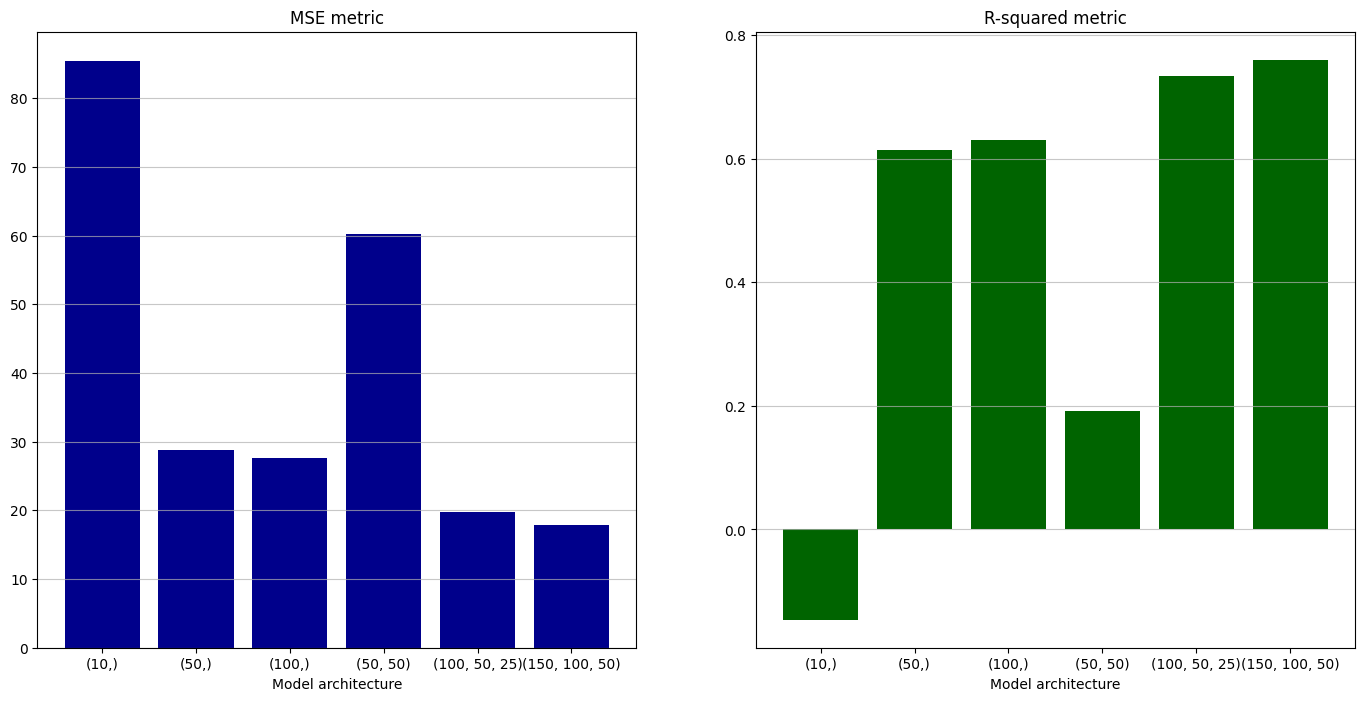

In [52]:
import matplotlib.pyplot as plt

print(results[0].values[0][1])

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(17, 8)

ax1.set_title("MSE metric")
ax1.set_xlabel('Model architecture')
ax1.grid(axis='y', linestyle='-', alpha=0.7)
ax1.bar([str(arch) for arch in architectures],
        [df.values[0][1] for df in results],
        color="darkblue")

ax2.set_title("R-squared metric")
ax2.set_xlabel('Model architecture')
ax2.grid(axis='y', linestyle='-', alpha=0.7)
ax2.bar([str(arch) for arch in architectures],
        [df.values[1][1] for df in results],
        color="darkgreen")

plt.show()

Spreading 100 neurons on 2 layers impacted model quality negatively, rather than just staying them on same single layer (look at metrics of models (100,) and (50, 50))